## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [6]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned ON


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

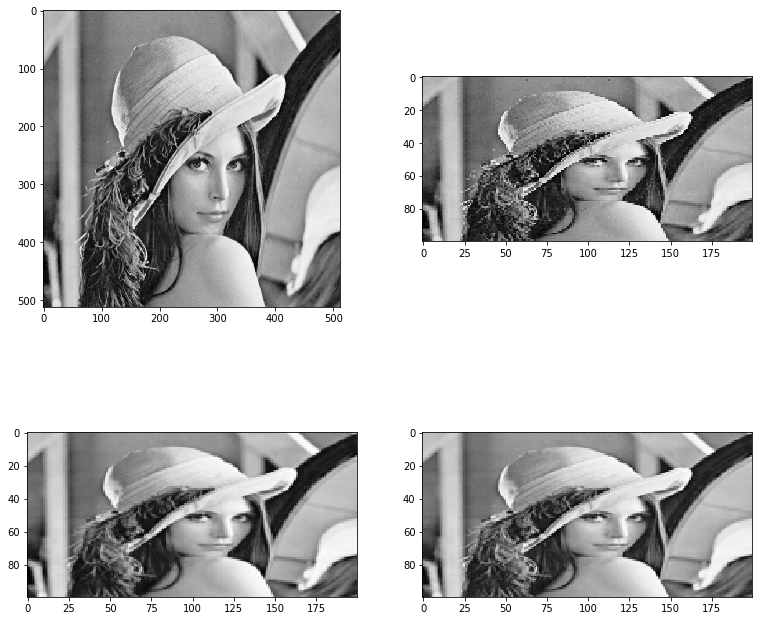

In [7]:
img_path='./images/lena-grey.bmp'
lena_im=io.imread(img_path)
plt.figure(figsize=(2^15,2^14)) #to use fix size we used these parameters in the figsize()
plt.subplot(221)
plt.imshow(lena_im,cmap=cm.Greys_r)
#imresize(arr, size, interp='bilinear', mode=None)
lena_nearest=misc.imresize(lena_im, (100,200) , interp='nearest' )
plt.subplot(222)
plt.imshow(lena_nearest,cmap=cm.Greys_r)
lena_bilinear=misc.imresize(lena_im, (100,200) , interp='bilinear' )
plt.subplot(223)
plt.imshow(lena_bilinear,cmap=cm.Greys_r)
lena_bicubic=misc.imresize(lena_im, (100,200) , interp='bicubic' )
plt.subplot(224)
plt.imshow(lena_bicubic,cmap=cm.Greys_r)


**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


300
300


/home/gulnur/Desktop/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


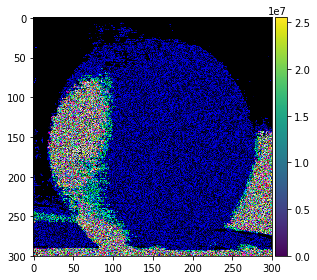

In [8]:
#RUBBISH
#not using grayscale
img_path_o='./images/orange.jpeg'
orange_im=io.imread(img_path_o)
#io.imshow(orange_im)
img_path_a='./images/apple.jpeg'
apple_im=io.imread(img_path_a)
#io.imshow(apple_im)
w,h,d= apple_im.shape
out=np.zeros(apple_im.shape)
print (w)
print(h)
#w=np.array(w)
#h=np.array(h)
for j in range(0, h):
    for i in range(0, w):
        out[i][j] = (orange_im[i][j]) * (100000 - 100) + (apple_im[i][j]) * 1000
io.imshow(out)

In [9]:
def simple_blend (image1, image2):
    height, width, depth = image1.shape
    blended = np.zeros_like(image1)
    orta = (np.ceil(width/2).astype('ubyte'))
    blended[:,:orta] = image1[:,:orta]
    blended[:,orta:width] = image2[:,orta:width]
    return blended

def alpha_blend (image1, image2, window):
    image1 = img_as_float(image1)
    image2 = img_as_float(image2)
    height, width, depth = image1.shape
    orta = np.ceil(width/2).astype('ubyte')
    alpha = np.arange(0,window*2)/(window*2-1)
    blended = np.zeros_like(image1)
    alpha_matrix = np.zeros_like(image1)
    for i in range (0,height):
        for j in range (orta-window,orta+window):
            alpha_matrix[i,j] = alpha[j-(orta-window)]
    for i in range (0, height):
        for j in range (orta+window,width):
            alpha_matrix[i,j] = 1            
    blended[:,:orta-window] = image1[:,:orta-window]
    blended[:,orta+window:width] = image2[:,orta+window:width]
    blended = image1 * alpha_matrix + (1 - alpha_matrix) * image2
    return blended

In [70]:
def pyramid_blend(image_1, image_2):
    #Yield images of the laplacian pyramid formed by the input image.
    laplac_1 = transform.pyramid_laplacian(image_1, 2)
    laplac_2 = transform.pyramid_laplacian(image_2, 2)
    l1 = [l1 for l1 in laplac_1]
    l2 = [l2 for l2 in laplac_2]
     
   
    k = np.zeros_like(image_1).astype(float)
    row,col=np.shape(k)  
    for i in range(0, row):
        for j in range(0, int(col/2)):
            k[i,j] = 1.0
    n = transform.pyramid_gaussian(k, 2)    
    m = [m for m in n] 
    
    laplace_pry=[]
    for i in range (0, len(m)):
        laplace_pry.append((m[i])*l1[i]+(1-m[i])*l2[i])

   
    seviye=len(laplace_pry)-1
    h=laplace_pry[seviye]
    while (seviye>0):
        w=transform.rescale(h,2)
        if h.shape != laplace_pry[seviye-1].shape:
            seviye=seviye-1
            h=w[:laplace_pry[seviye].shape[0], :laplace_pry[seviye].shape[1]]+laplace_pry[seviye]
        else:
            seviye=seviye-1
            h=w+laplace_pry[seviye]
            
    
    return h

/home/gulnur/Desktop/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


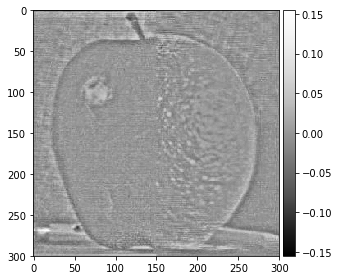

In [72]:
img_path = './images/'
img_name = 'apple.jpeg'
elma= io.imread(img_path.__add__(img_name))

img_path = './images/'
img_name = 'orange.jpeg'
portakal= io.imread(img_path.__add__(img_name))

simpleblend = simple_blend(elma, portakal)

alphablend = alpha_blend(elma, portakal, 40)

img_path = './images/'
img_name = 'apple.jpeg'
elma = img_as_float(io.imread(img_path.__add__(img_name),as_grey=True))
img_path = './images/'
img_name = 'orange.jpeg'
portakal = img_as_float(io.imread(img_path.__add__(img_name),as_grey=True))

pyramidblend = pyramid_blend(elma, portakal)
io.imshow(pyramidblend,cmap=cm.Greys_r)


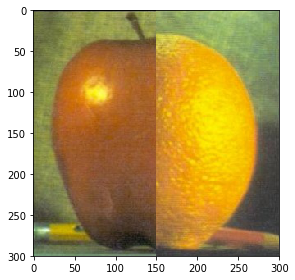

In [46]:
io.imshow(simpleblend)

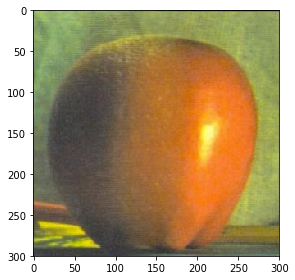

In [47]:
io.imshow(alphablend)

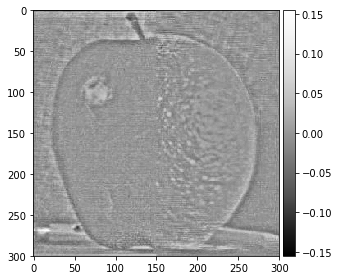

In [73]:
io.imshow(pyramidblend,cmap=cm.Greys_r)
